In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\theow\Documents\Project\Explainable-Loan-Default\data\raw\credit_risk_dataset.csv")


print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
# Summary statistics
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
# Data types
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [10]:
# Missing values
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
# Duplicate entries
df.duplicated().sum()

np.int64(165)

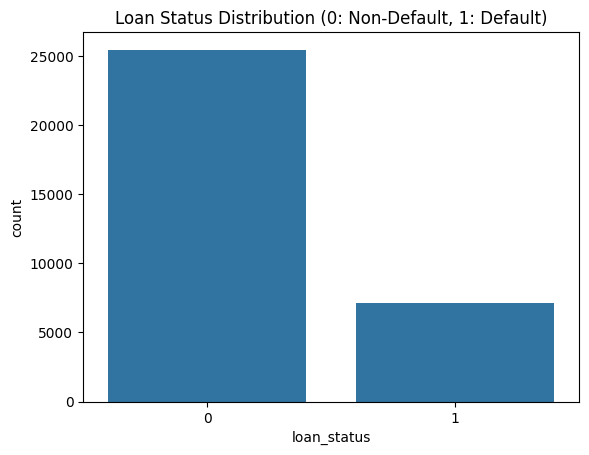

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


In [12]:
# Target distribution
sns.countplot(x="loan_status", data=df)
plt.title("Loan Status Distribution (0: Non-Default, 1: Default)")
plt.show()

# Value counts and percentages
print(df["loan_status"].value_counts(normalize=True) * 100)


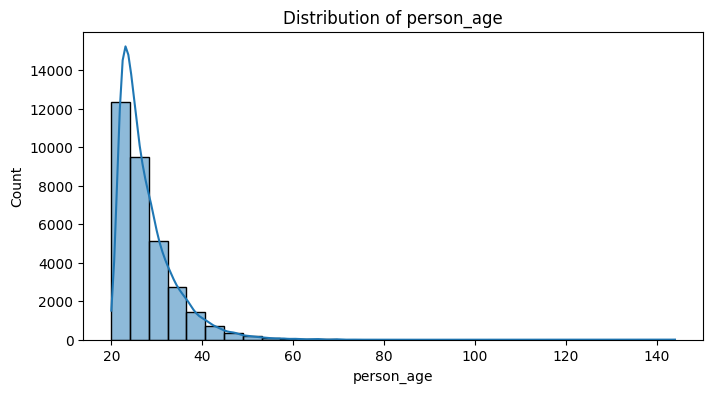

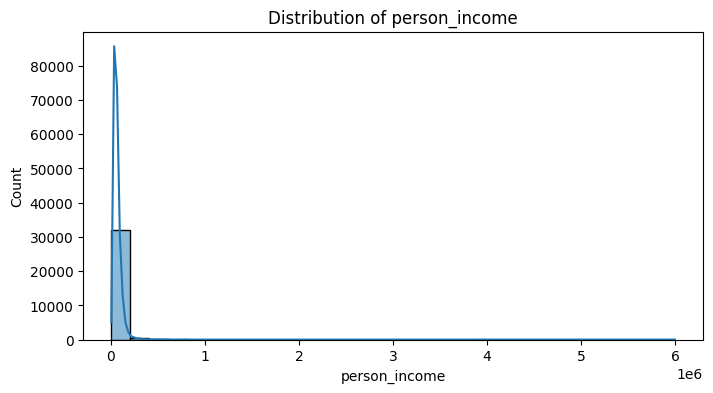

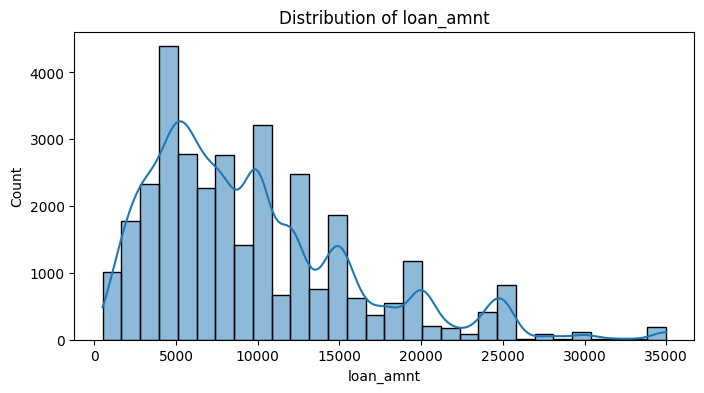

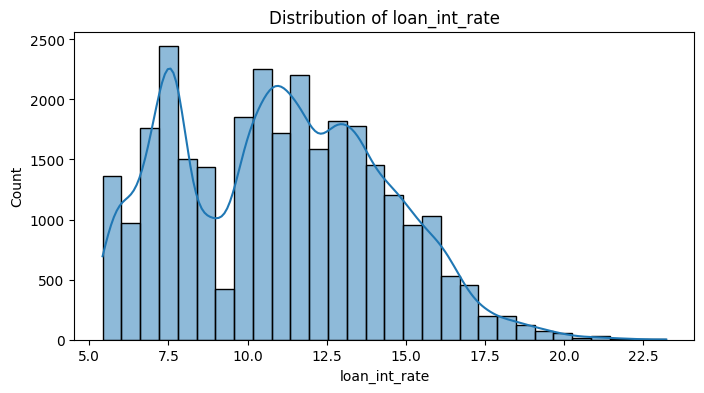

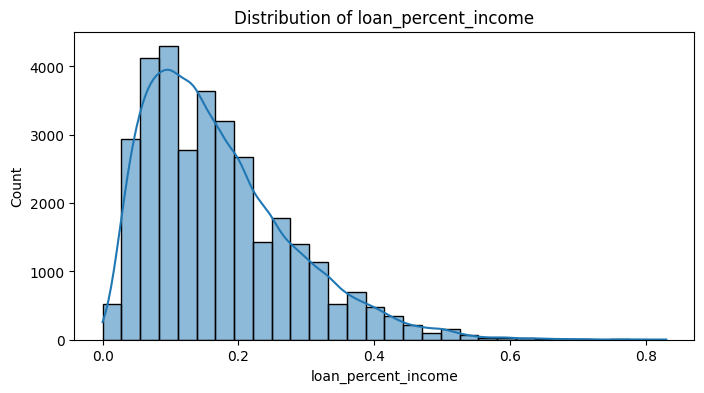

In [13]:
# Numerical features
num_features = ["person_age", "person_income", "loan_amnt", "loan_int_rate", "loan_percent_income"]

for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


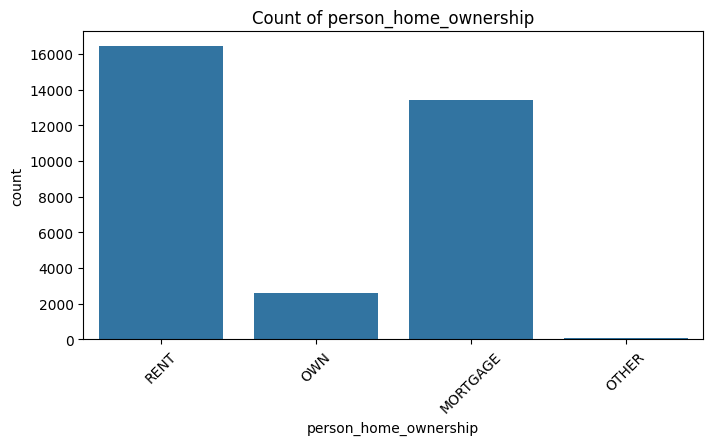

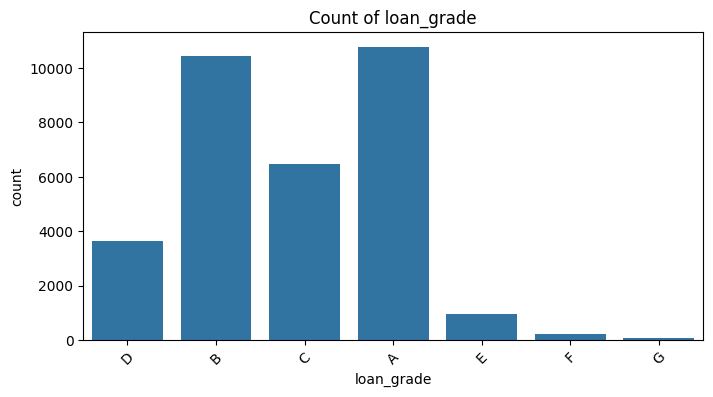

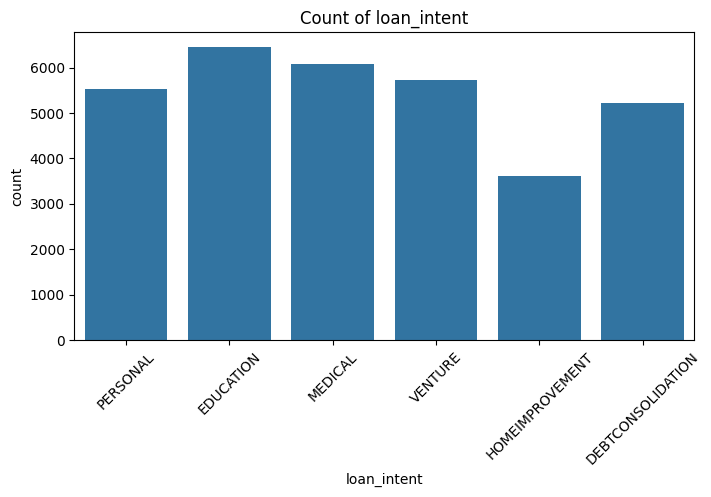

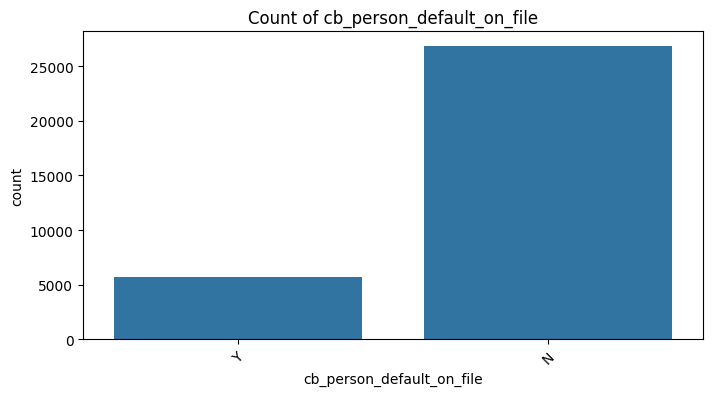

In [14]:
# Categorical features
cat_features = ["person_home_ownership", "loan_grade", "loan_intent", "cb_person_default_on_file"]

for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f"Count of {feature}")
    plt.xticks(rotation=45)
    plt.show()


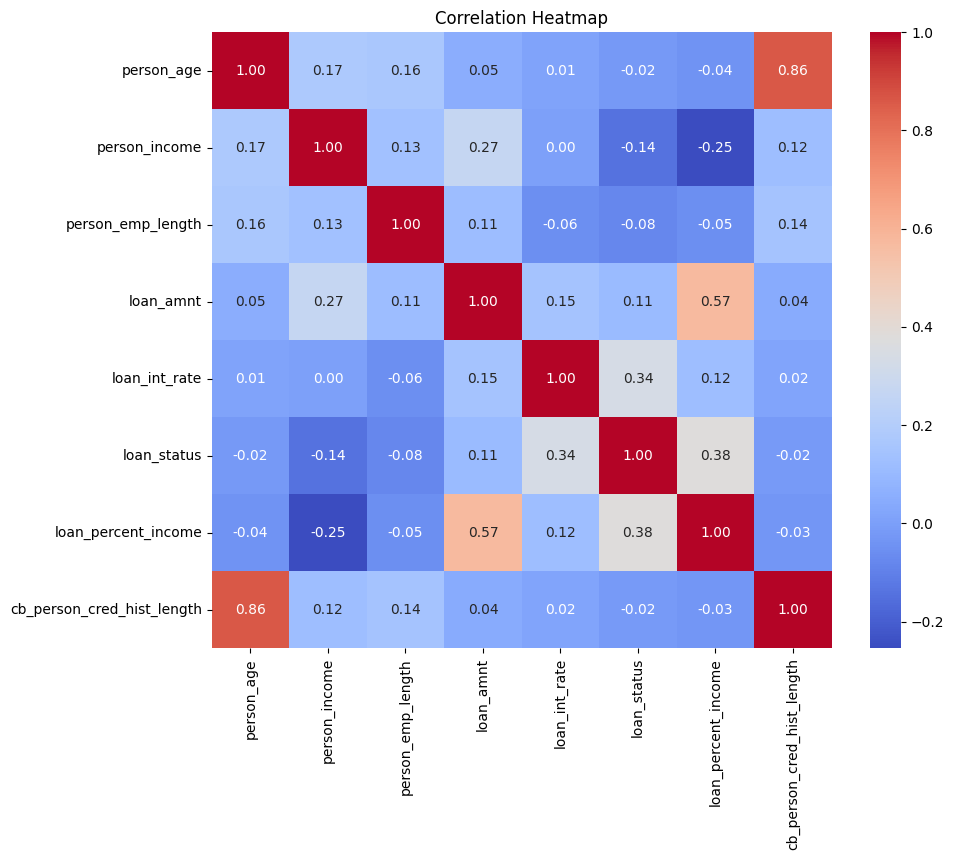

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


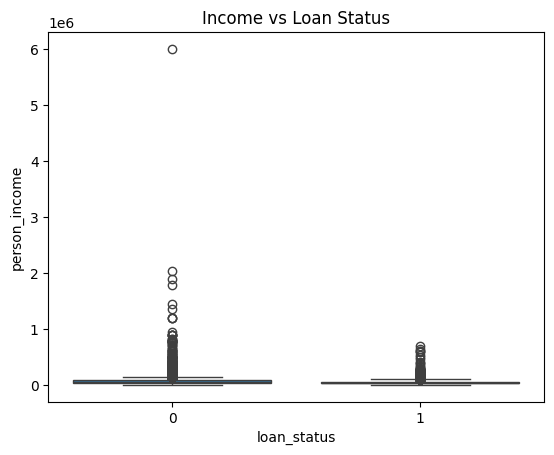

In [16]:
# Boxplot: income vs loan_status
sns.boxplot(x="loan_status", y="person_income", data=df)
plt.title("Income vs Loan Status")
plt.show()


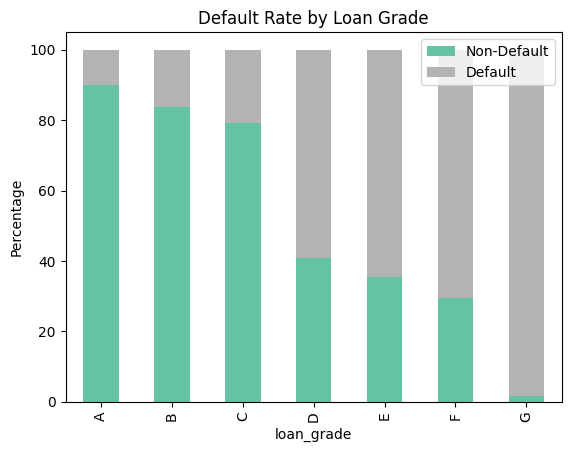

In [17]:
# Default rate by loan grade
grade_default = pd.crosstab(df["loan_grade"], df["loan_status"], normalize="index") * 100
grade_default.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("Default Rate by Loan Grade")
plt.ylabel("Percentage")
plt.legend(["Non-Default", "Default"])
plt.show()


In [18]:
from scipy.stats import ttest_ind

# Example: income by default status
group0 = df[df["loan_status"] == 0]["person_income"]
group1 = df[df["loan_status"] == 1]["person_income"]

t_stat, p_val = ttest_ind(group0, group1)
print(f"T-test: t-stat={t_stat:.3f}, p-value={p_val:.5f}")


T-test: t-stat=26.349, p-value=0.00000


In [20]:
min_income = df['person_income'].min()
max_income = df['person_income'].max()

print(f"Minimum value of person_income: {min_income}")
print(f"Maximum value of person_income: {max_income}")

Minimum value of person_income: 4000
Maximum value of person_income: 6000000


In [21]:
describe_result = df['person_income'].describe()
print("Describe result:")
print(describe_result)

Describe result:
count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64
